In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
notebook_dir = os.getcwd() 
src_path = os.path.abspath(os.path.join(notebook_dir, '../src'))
sys.path.append(src_path)
from visualization import create_histograms, scatter_plot, grouped_histograms, histograms_with_price
from preprocessing import group_by_engine, processing, normalize
from models import RidgeRegression, NonLinearRegression, LocallyWeightedRegression
from metrics import rmse, mae, r2
from data_splitting import train_val_split, cross_val

In [2]:
df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP2/data/raw/toyota_dev.csv')
test_df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP2/data/raw/toyota_test.csv')

In [3]:
df_path = processing(df)

Archivo guardado como: /home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP2/data/processed/dataset_procesado_20240904_225955.csv


In [4]:
test_df_path = processing(test_df)

Archivo guardado como: /home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP2/data/processed/dataset_procesado_20240904_225956.csv


In [5]:
processed_df = pd.read_csv(df_path)
processed_df = processed_df.drop(columns=['Nafta/GNC'])
processed_df = processed_df.drop(columns=['hibrido'])
processed_test_df = pd.read_csv(test_df_path)

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- a.1) Histogramas para vizualizar la distribucion de tipos de vehiculo, años de fabricacion y kilometros recorridos**

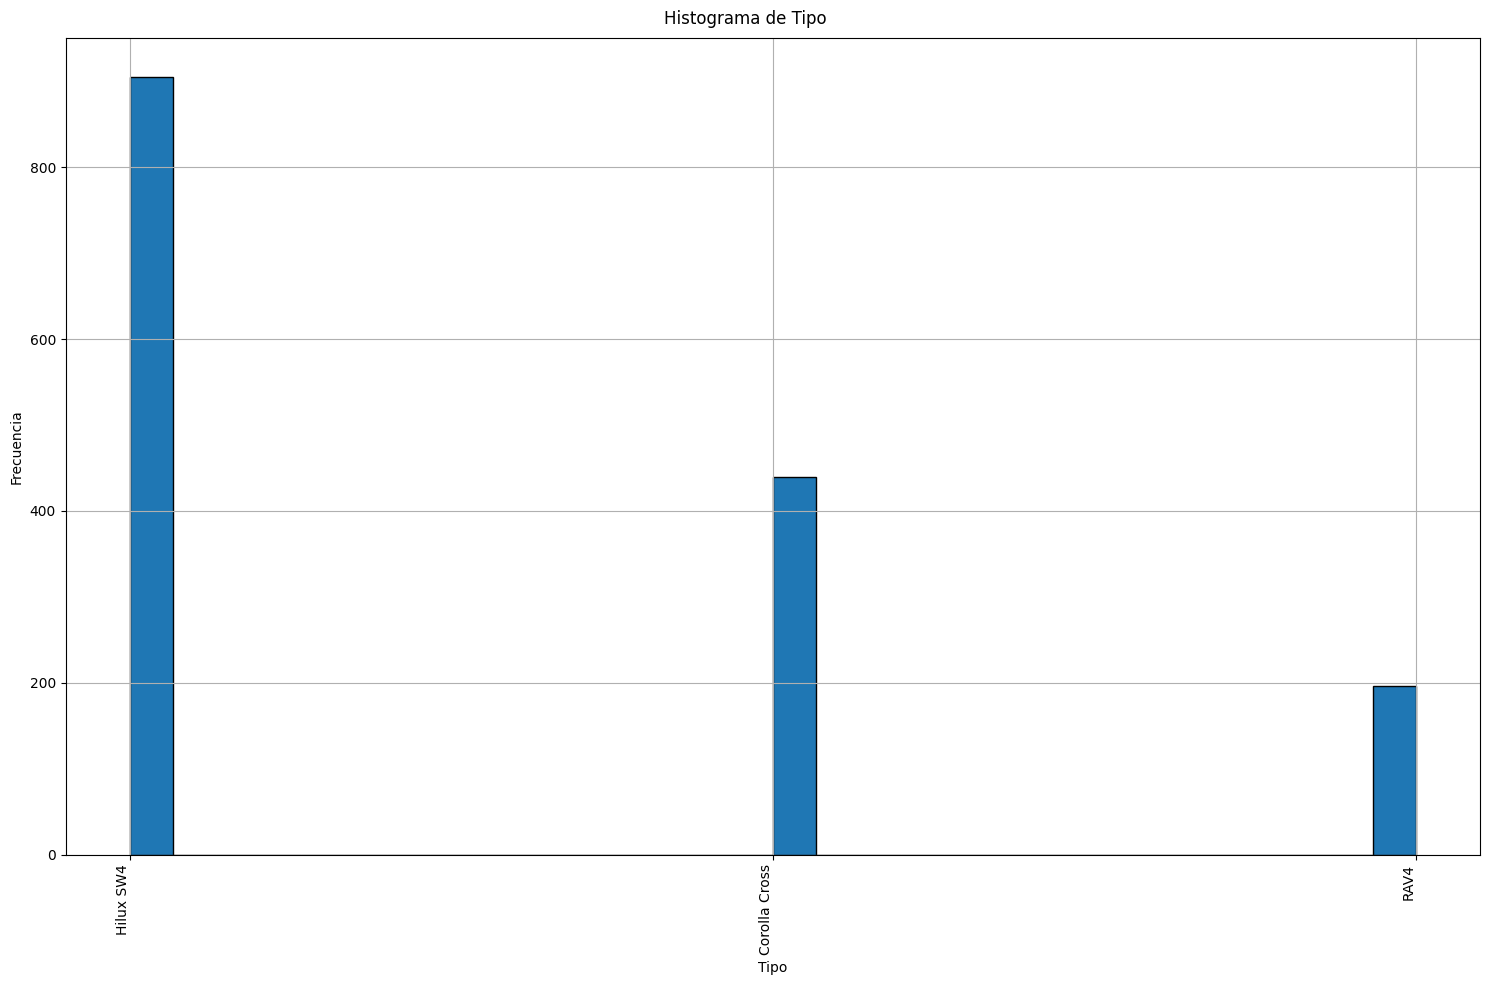

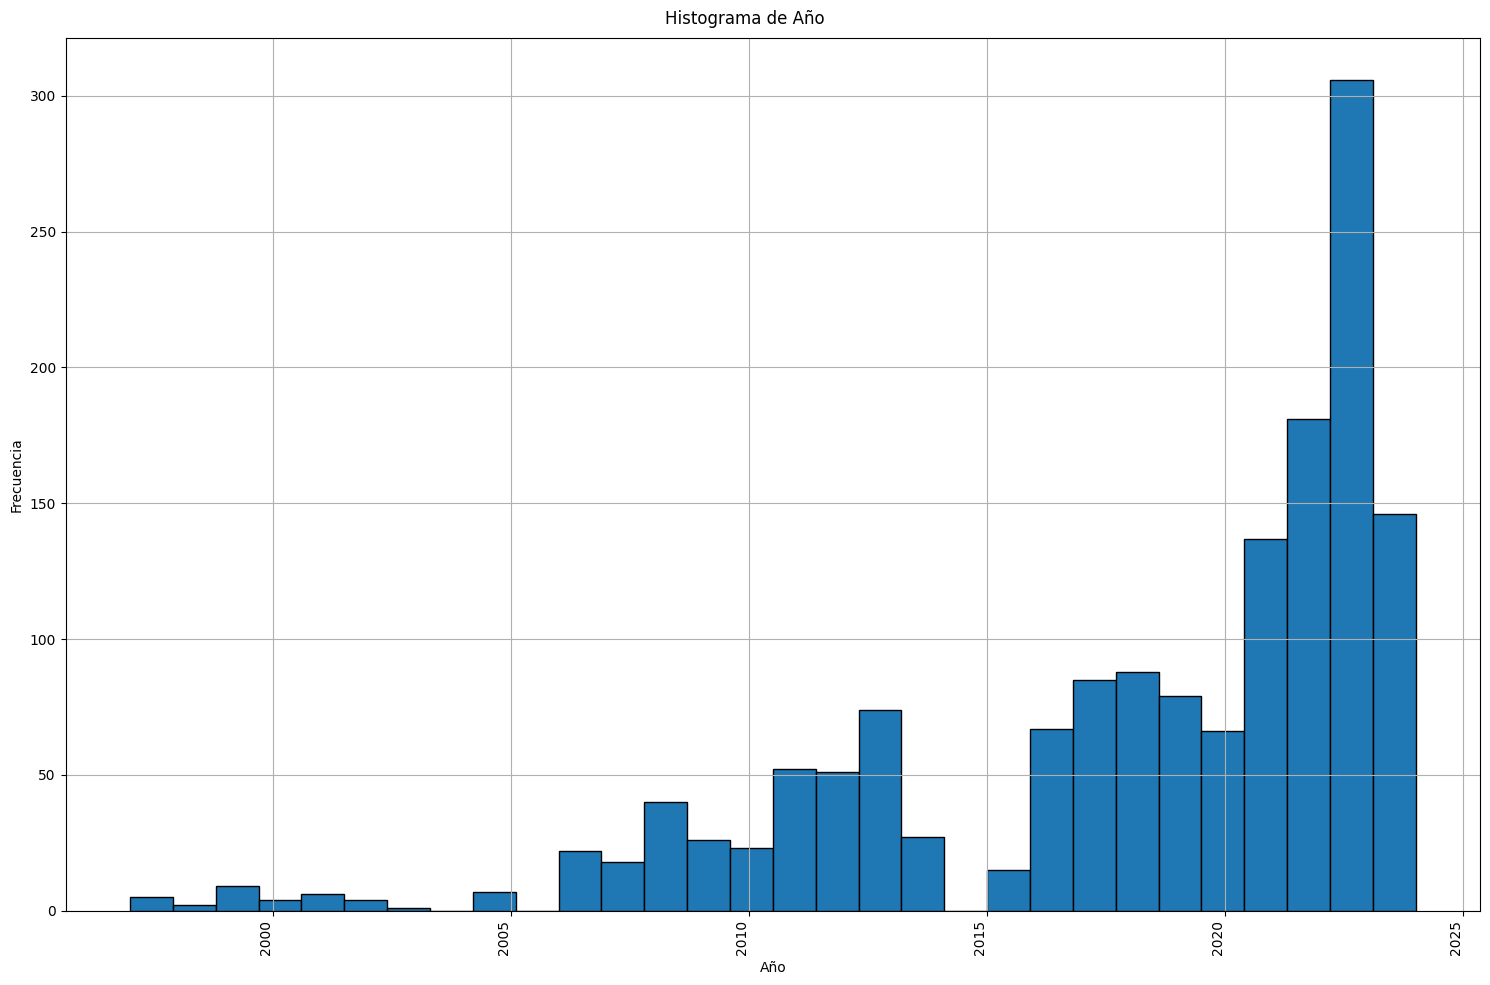

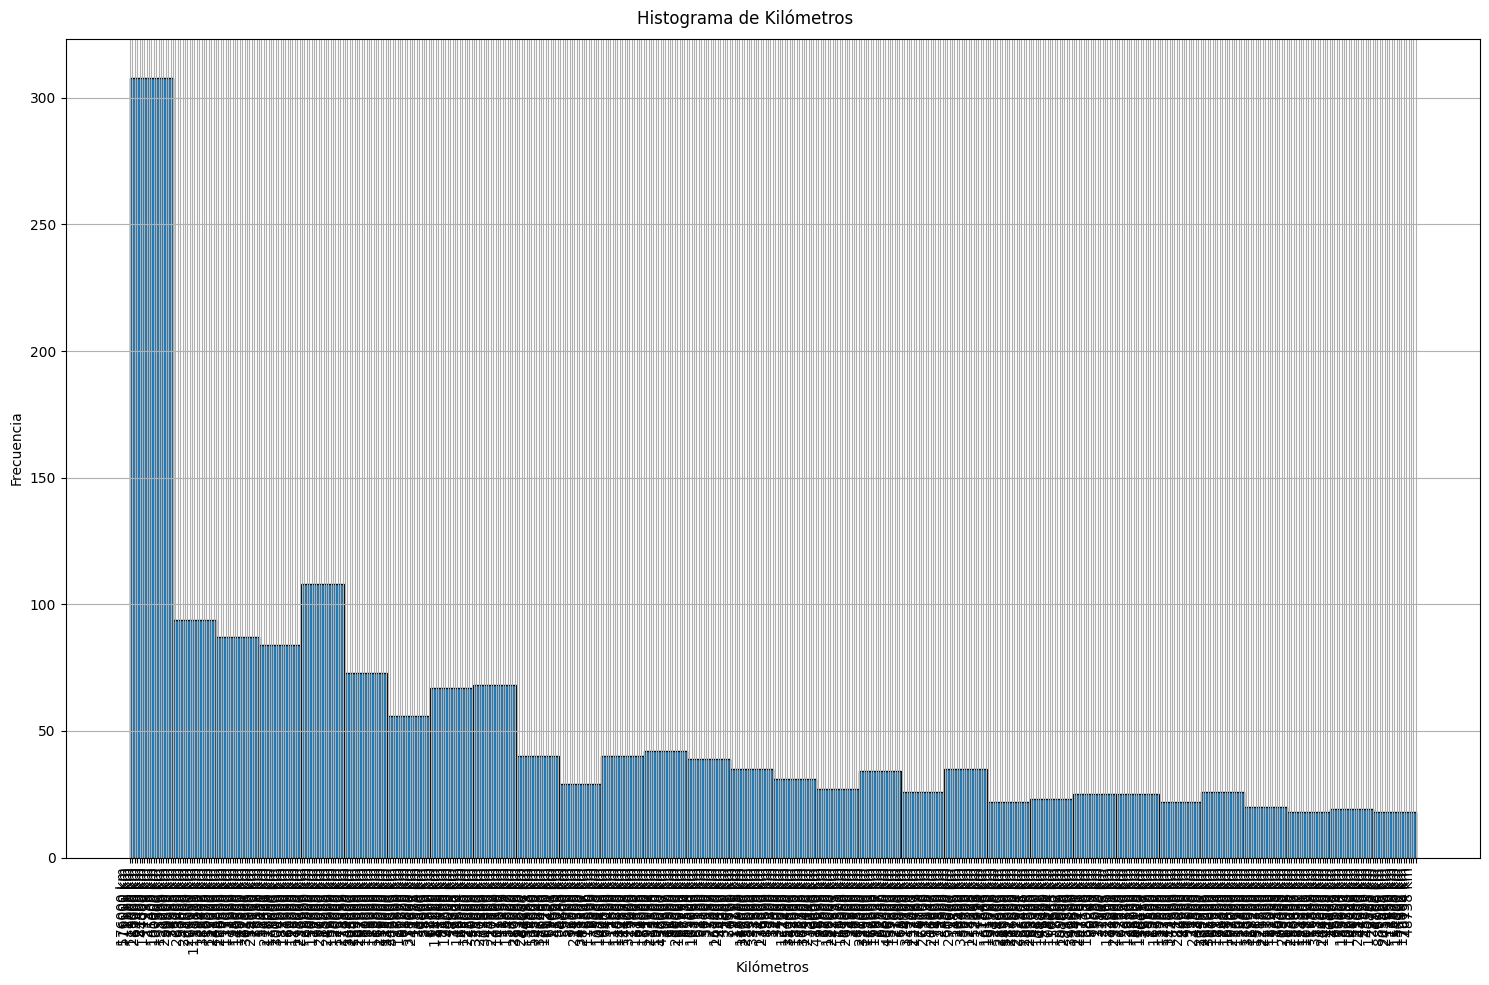

In [3]:
features_ = ['Tipo', 'Año', 'Kilómetros']
create_histograms(features_, df)


In [15]:
cantidad_hilux = df[df['Tipo'] == 'Hilux SW4']['Tipo'].count()
print(f'Cantidad total de autos tipo Hilux SW4: {cantidad_hilux}')
cantidad_corolla_cross = df[df['Tipo'] == 'Corolla Cross']['Tipo'].count()
print(f'Cantidad total de autos tipo Corolla Cross: {cantidad_corolla_cross}')
cantidad_RAV4 = df[df['Tipo'] == 'RAV4']['Tipo'].count()
print(f'Cantidad total de autos tipo RAV4: {cantidad_RAV4}')

Cantidad total de autos tipo Hilux SW4: 905
Cantidad total de autos tipo Corolla Cross: 440
Cantidad total de autos tipo RAV4: 196


In [14]:
promedio_anio_fabricacion = df['Año'].mean()
print(f'El año de fabricacion promedio de todos los auto es: {promedio_anio_fabricacion}\n')

print(f'---------------------------------------------------------------------------------')

promedio_anio_fabriacion_hilux = df[df['Tipo'] == 'Hilux SW4']['Año'].mean()
print(f'\nEl promedio de año de fabricacion de la hilux es: {promedio_anio_fabriacion_hilux}')
valores_unicos_anio_fabricacion_hilux = df[df['Tipo'] == 'Hilux SW4']['Año'].unique()
print(f'Valores unicos de fabricacion de la hilux: {valores_unicos_anio_fabricacion_hilux}\n')

print(f'---------------------------------------------------------------------------------')

promedio_anio_fabriacion_corolla = df[df['Tipo'] == 'Corolla Cross']['Año'].mean()
print(f'\nEl promedio de año de fabricacion del Corolla Cross es: {promedio_anio_fabriacion_corolla}')
valores_unicos_anio_fabricacion_corolla = df[df['Tipo'] == 'Corolla Cross']['Año'].unique()
print(f'Valores unicos de fabricacion del Corolla Cross es: {valores_unicos_anio_fabricacion_corolla}\n')

print(f'---------------------------------------------------------------------------------')

promedio_anio_fabriacion_RAV4 = df[df['Tipo'] == 'RAV4']['Año'].mean()
print(f'\nEl promedio de año de fabricacion de la RAV4 es: {promedio_anio_fabriacion_RAV4}')
valores_unicos_anio_fabricacion_RAV4= df[df['Tipo'] == 'RAV4']['Año'].unique()
print(f'Valores unicos de fabricacion de la RAV4: {valores_unicos_anio_fabricacion_RAV4}')


El año de fabricacion promedio de todos los auto es: 2018.259571706684

---------------------------------------------------------------------------------

El promedio de año de fabricacion de la hilux es: 2016.7613259668508
Valores unicos de fabricacion de la hilux: [2013. 1999. 2017. 2018. 2021. 2020. 2011. 2010. 2019. 2023. 2006. 2008.
 2012. 2009. 2022. 2024. 2007. 2016. 2014. 2015. 1997. 2001. 2002. 2005.
 2003. 1998. 2000.]

---------------------------------------------------------------------------------

El promedio de año de fabricacion del Corolla Cross es: 2022.784090909091
Valores unicos de fabricacion del Corolla Cross es: [2023. 2021. 2024. 2022.]

---------------------------------------------------------------------------------

El promedio de año de fabricacion de la RAV4 es: 2015.0204081632653
Valores unicos de fabricacion de la RAV4: [2017. 2018. 2021. 2008. 2013. 2019. 2009. 2012. 2011. 2014. 2010. 2022.
 2020. 2015. 2023. 2016. 2002.]


In [16]:
promedio_kilometros_hilux = df[df['Tipo'] == 'Hilux SW4']['Kilómetros'].str.replace(' km', '').str.replace('.', '').astype(float).mean()
print(f'El promedio de kilometros del vehiculo Hilux SW4 es: {promedio_kilometros_hilux}')

promedio_kilometros_RAV4 = df[df['Tipo'] == 'RAV4']['Kilómetros'].str.replace(' km', '').str.replace('.', '').astype(float).mean()
print(f'El promedio de kilometros del vehiculo RAV4 es: {promedio_kilometros_RAV4}')

promedio_kilometros_corolla = df[df['Tipo'] == 'Corolla Cross']['Kilómetros'].str.replace(' km', '').str.replace('.', '').astype(float).mean()
print(f'El promedio de kilometros del vehiculo Corolla Cross es: {promedio_kilometros_corolla}')

El promedio de kilometros del vehiculo Hilux SW4 es: 116940.017679558
El promedio de kilometros del vehiculo RAV4 es: 122026.58673469388
El promedio de kilometros del vehiculo Corolla Cross es: 18405.159090909092


<div style="font-family: 'Source Code Pro'; font-size: 22px;">

## **Analisis de los graficos:**

- **Grafico 1 (Histograma de modelos):** Hay una mayoria de vehiculos del tipo Hilux SW4 (905), luego esta seguido por el corolla cross (440), por ultimo el RAV4 (196)

- **Grafico 2 (Histograma de anio de fabricacion):** El histograma muestra que la mayoria de los autos en el conjunto de datos son relativamente nuevos, con un promedio de año de fabriacion en 2018. Esto indica que, en general, se traata de vehiculos que no serian considerados viejos en el mercado actual. Al observar los diferentes modelos, se puede ver que los autos Corolla Cross corrseponden en su mayoria a vehiculos muy recientes. En contraste, el modelo Hilux presenta una mayor dispersion en los años de fabricacion, abarcando un rango mas amplio de antiguedad. Por otro lado, el RAV4 se encuentra en un punto intermedio, con una distribucion que incluye tanto vehiculos nuevos como aquellos no tan recientes. Es evidente que a mayor rango de años de fabricacion, mayor sera la cantidad de datos disponibles para ese modelo de vehiculo.

- **Grafico 3 (Histograma de kilometros recorridos):** EL histograma revela que el modelo de vehiculo RAV4 tiene, en promedio, una menor cantidad de kilometros recorridos en comparacion con otros modelos. En contraste, los modelos Hilux y Corolla Cross muestran un mayor numero de kilometros recorridos. Esta diferencia en los kilometros se alinea con el rango de años de fabricacion de los vehiculos, ya que los modelos mas antiguso tienden a tener un mayot kilometraje.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- a.2) Graficos de dispersion para analizar la cobertura de datos**

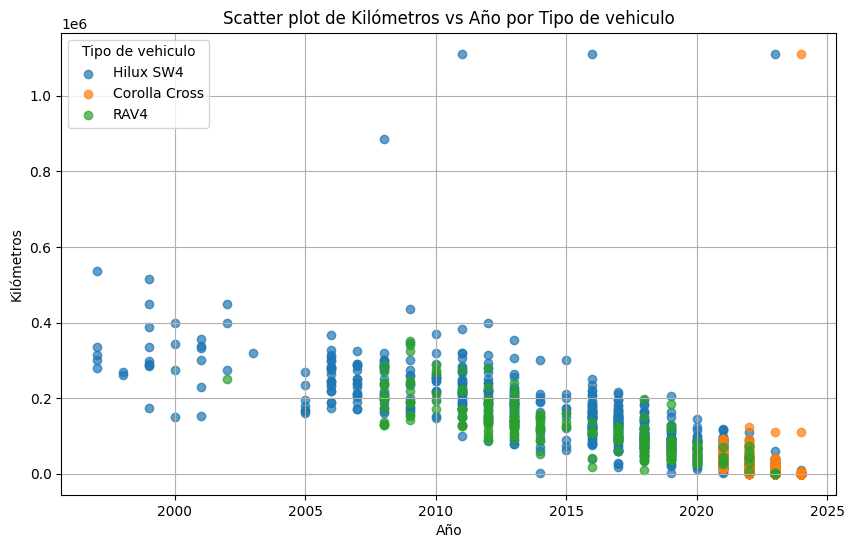

In [ ]:
scatter_plot(df, 'Año', 'Kilómetros',  'Tipo')

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

Se puede observar lo que se hablaba previamente en cuanto a la relacion de años y kilometros recorridos. Tambien se ve que hay algunos outliers, especialmente para el tipo de vehiculo Hilux SW4.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- a.3) Visualizacion de la variable motor segun tipo de vehiculo**

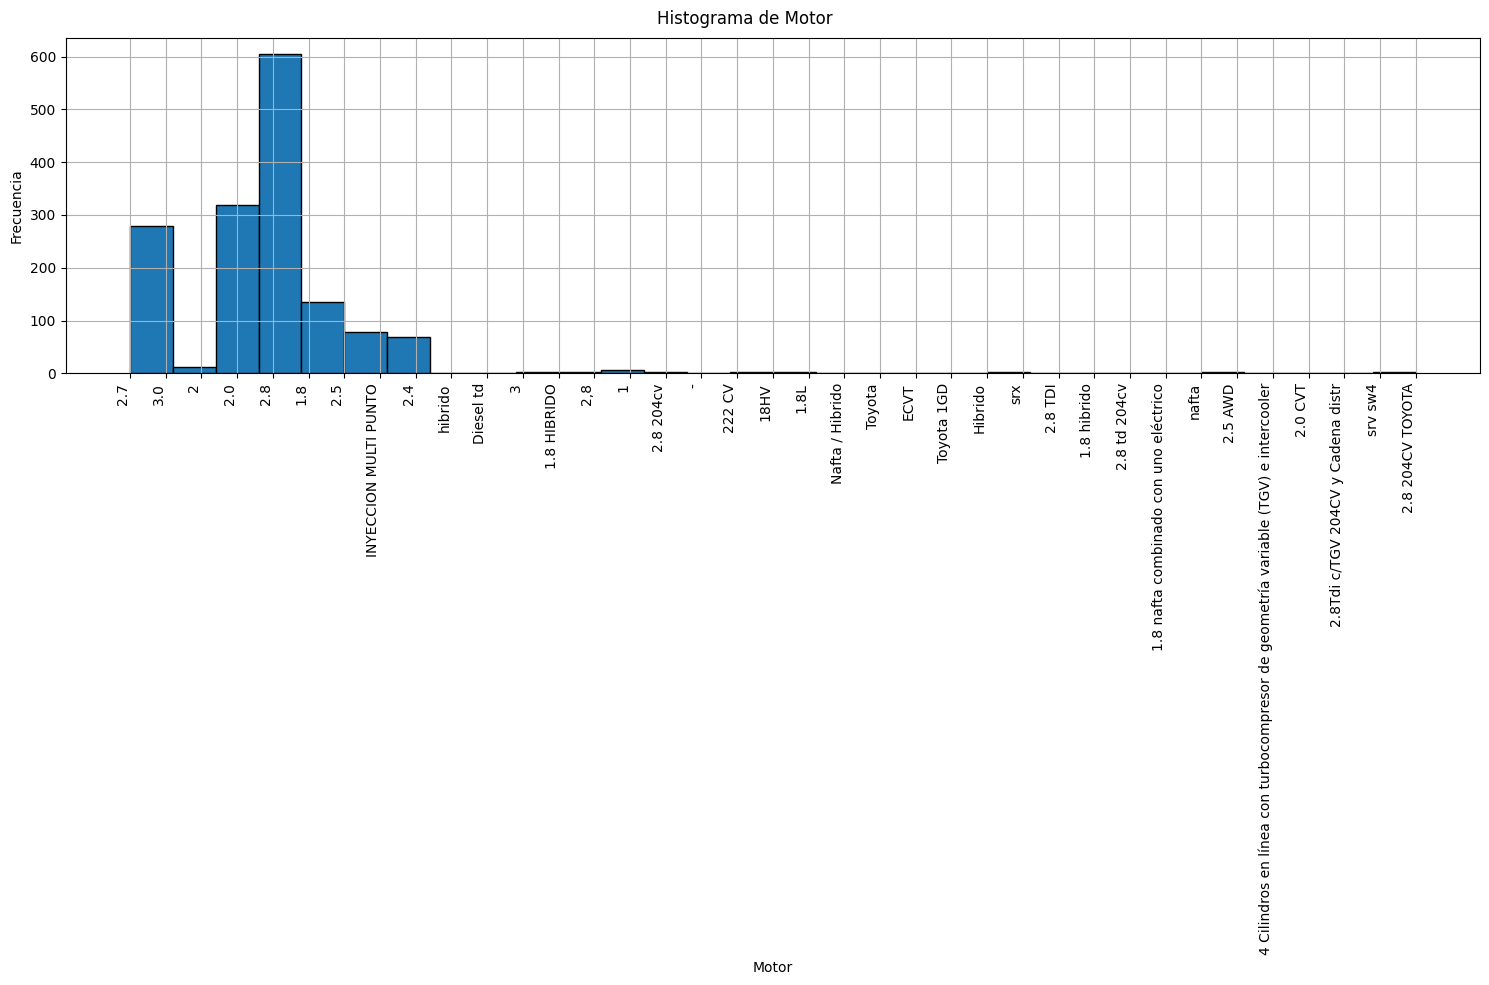

In [ ]:
Motor = ['Motor']
create_histograms(Motor, df)

df['Motor'] = df['Motor'].astype(str).str.lower().str.strip()
df['Motor_Agrupado'] = df['Motor'].apply(group_by_engine)

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

Se observa que existen multiples variantes del mismo tipo de motor. Seria beneficioso agrupar estas variantes que corresponden al mismo motor para evitar un aumento innecesario del tamanio del conjunto de datos cuando se realice el proceso de encoding.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- a.4/5) Distribuciones de motor agrupado, transmision y color respecto del tipo de vehiculo**

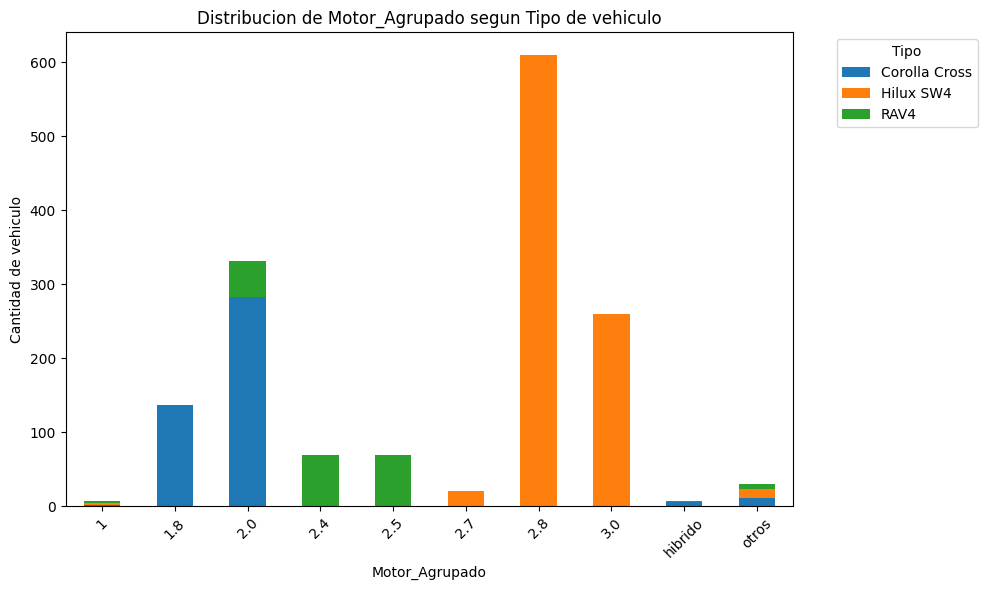

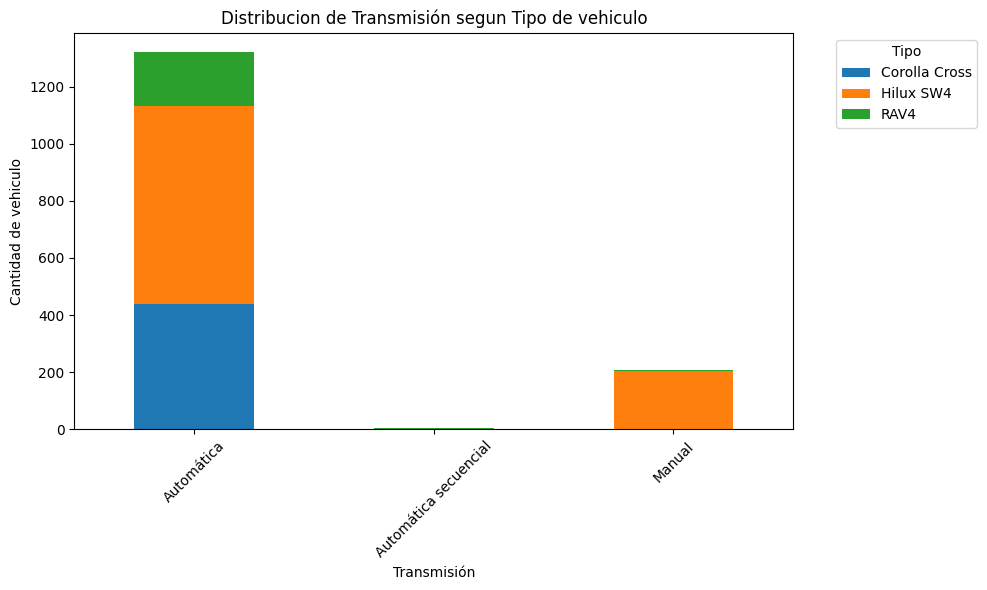

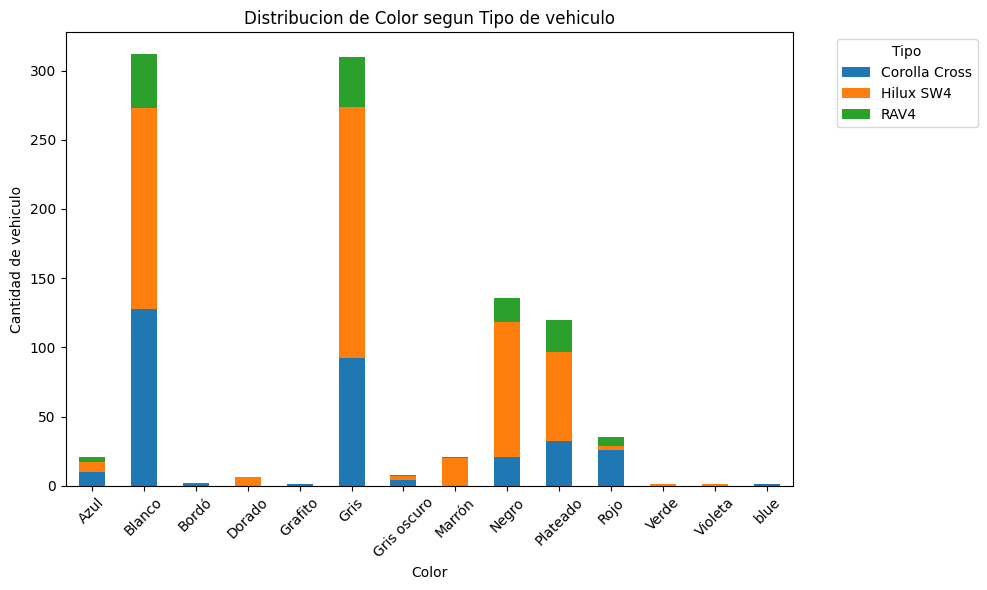

In [ ]:
features1 = ['Motor_Agrupado', 'Transmisión', 'Color']


for feature1 in features1:
    grouped_histograms(feature1, 'Tipo', df)

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

De estos graficos se observa como relevante que la transmision automatica secuencial presenta practicamente nulos datos, indicaria que es una variable que podria descartarse de cara al entrenamiento de los modelos.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- b.1) Variacion del precio de venta en funcion de los kilometros recorridos.**

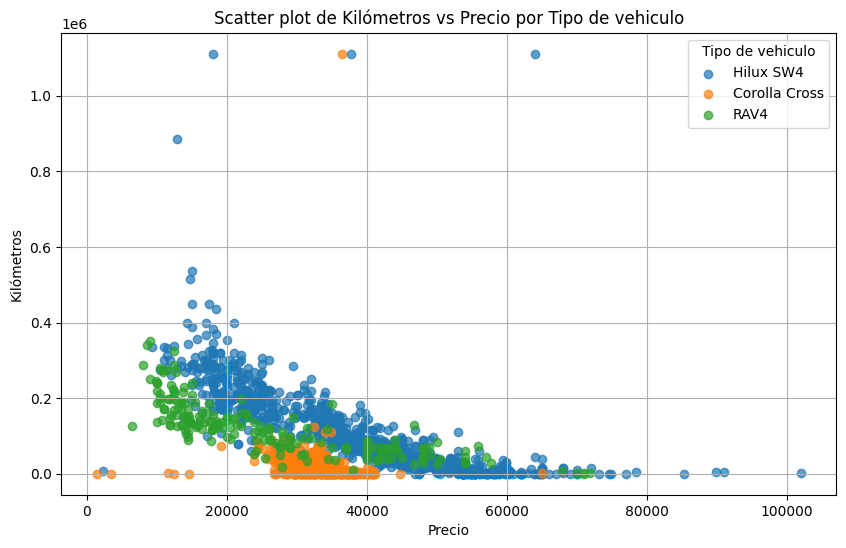

In [ ]:
scatter_plot(df, 'Precio', 'Kilómetros',  'Tipo')

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

Hay una tendencia clara en los vehiculos del tipo Hilux SW4 y RAV4 a aumentar su precio a menores kilometros recorridos. En cuanto al Corolla Cross, se puede ver que hay un rango mas chico para los precios pero esto se debe principalmente a que este tipo de vehiculo es mas nuevo y practicamente no hay variantes de este tipo que presenten muchos kilometros recorridos.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- b.2) Distribucion de precios de venta entre los distintos tipos de SUV**

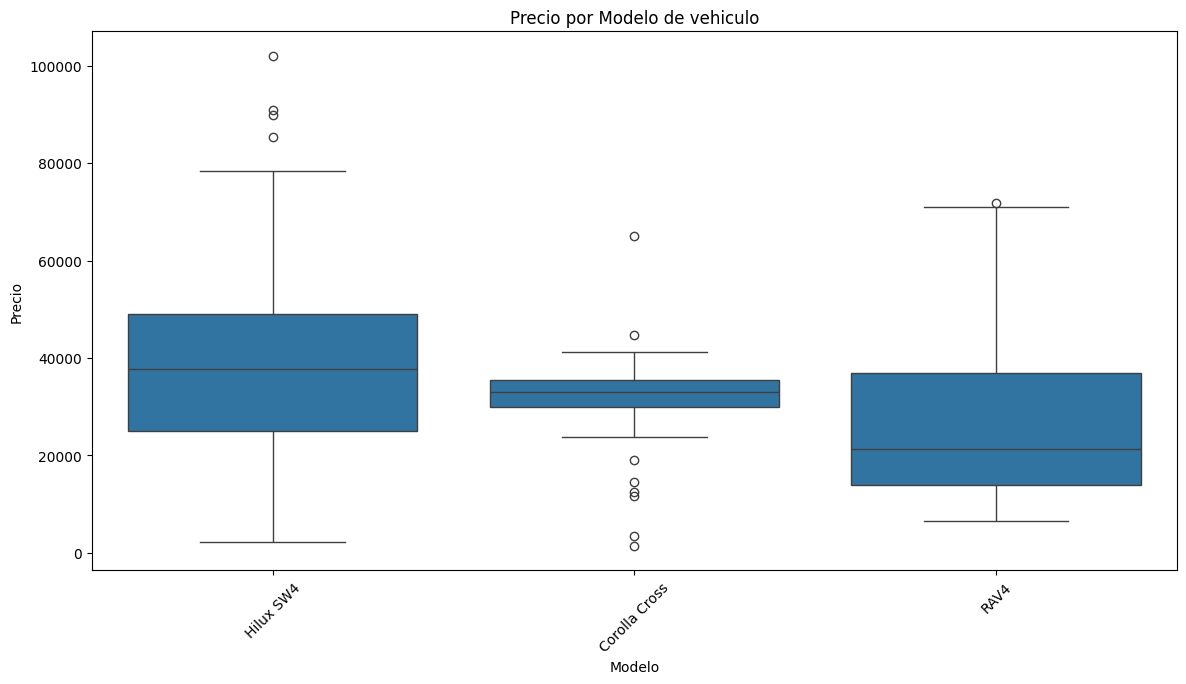

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x = 'Tipo', y='Precio')
plt.title('Precio por Modelo de vehiculo')
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

Se pueden observar algunos outliers en el tipo de vehiculo Hilux SW4. Tal como se habia visto previamente

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- b.3) Analizar la distribución del precio de venta según el año del vehículo.**

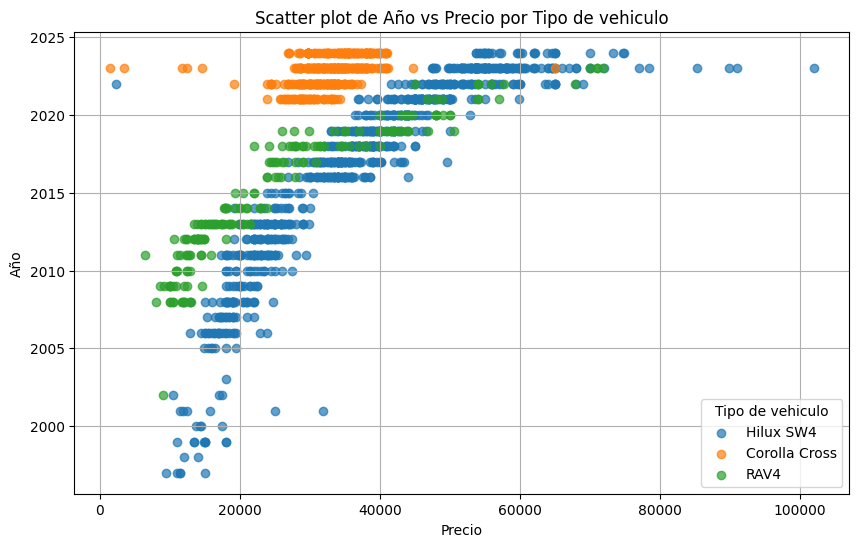

In [ ]:
scatter_plot(df, 'Precio', 'Año', 'Tipo')

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- b.4) Utilidad de la variable color**

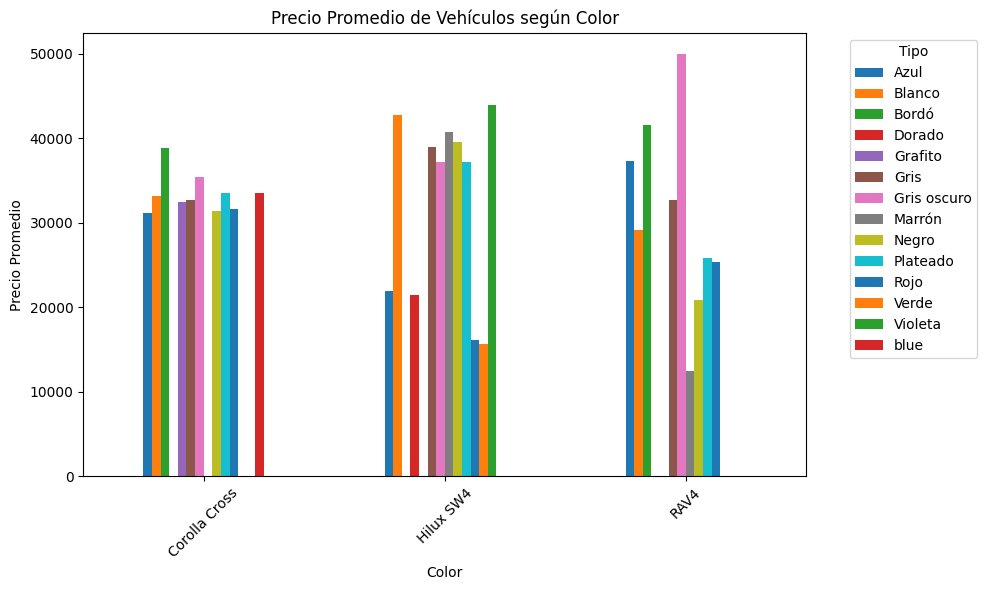

In [ ]:
color = 'Color'
tipo = 'Tipo'

histograms_with_price(df, color, tipo)

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

El histograma no da maucha informacion acerca de la utilidad de la variable color, mas adelante se hara un analisis de correlacion del precio y el color para obtener informacion de mayor valor.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# 1- **b.5) Variacion de precio de venta segun tipo de combustible**

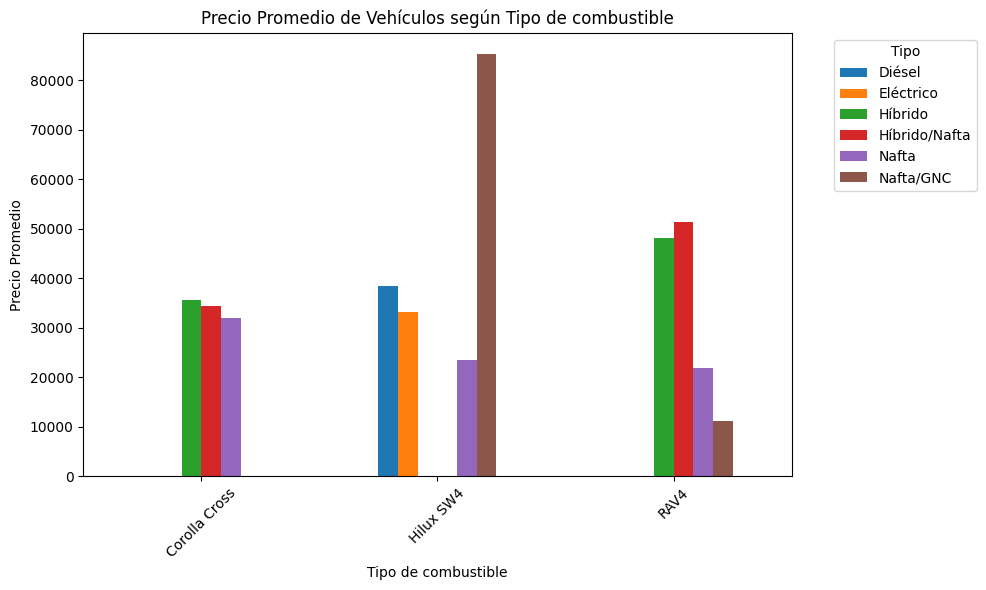

In [ ]:
feature1 = 'Tipo de combustible'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)

<div style="font-family: 'Source Code Pro'; font-size: 20px;">

No hay mucha variacion en cuanto al precio de venta debido al tipo de combustible utilziado, se observa un pico en la variable Nafta/GNC pero puede ser debido a outliers.

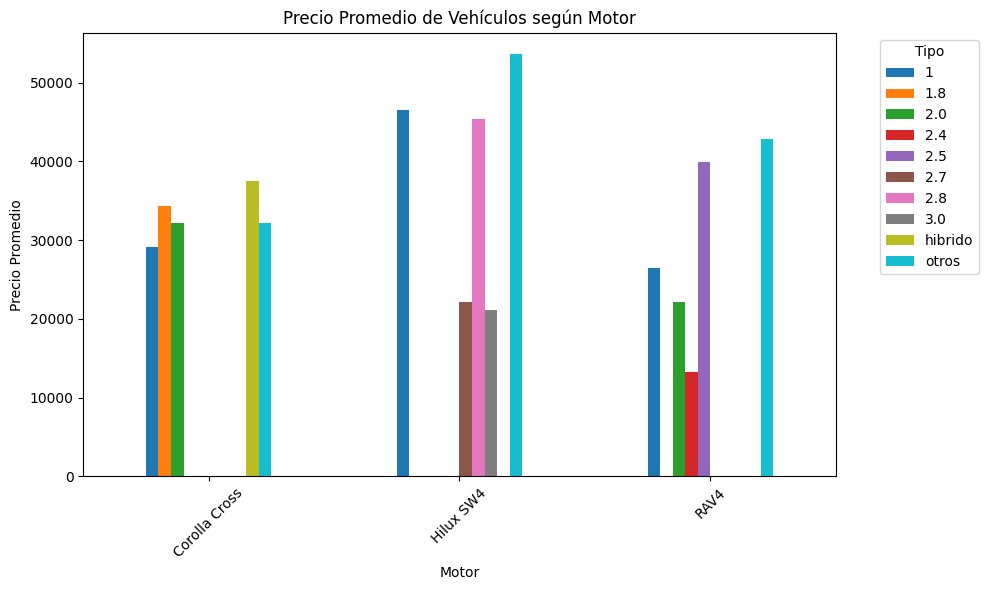

In [30]:
df['Motor'] = df['Motor'].apply(group_by_engine)
feature1 = 'Motor'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

# **1- b.6) Precio de venta en funcion del tipo de transmision**

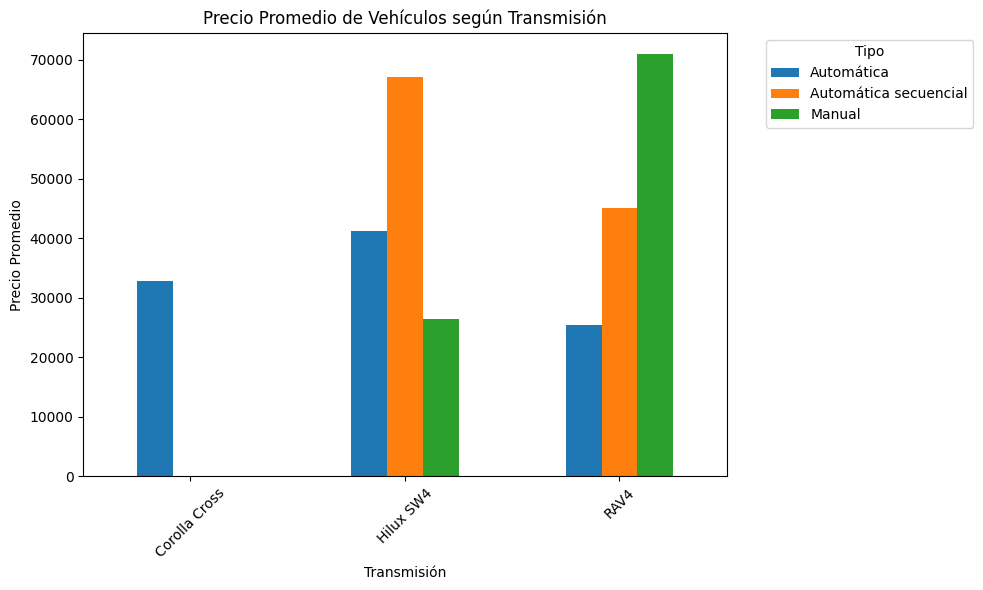

In [ ]:
feature1 = 'Transmisión'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)


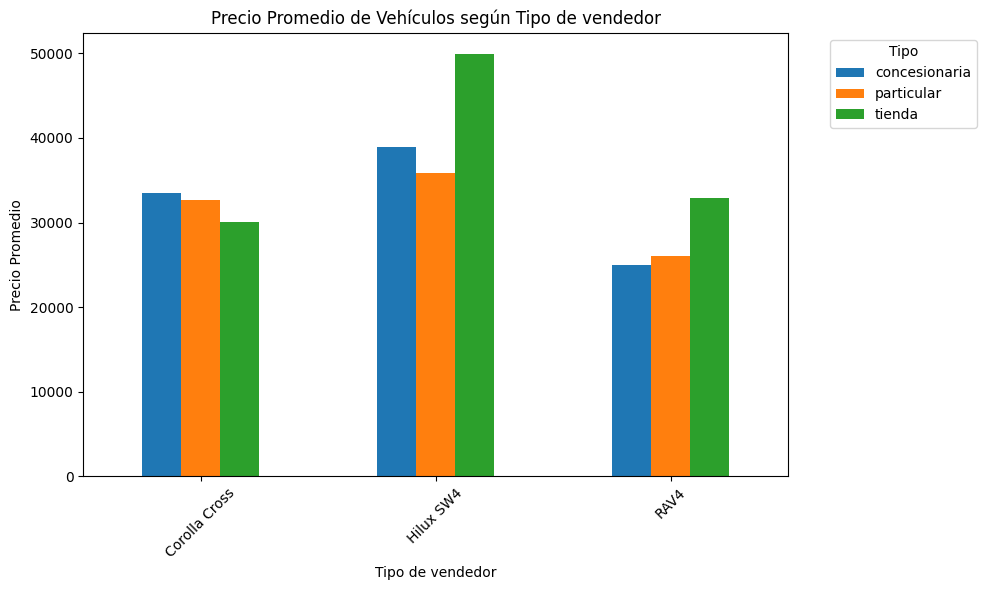

In [ ]:
feature1 = 'Tipo de vendedor'
feature2 = 'Tipo'

histograms_with_price(df, feature1, feature2)

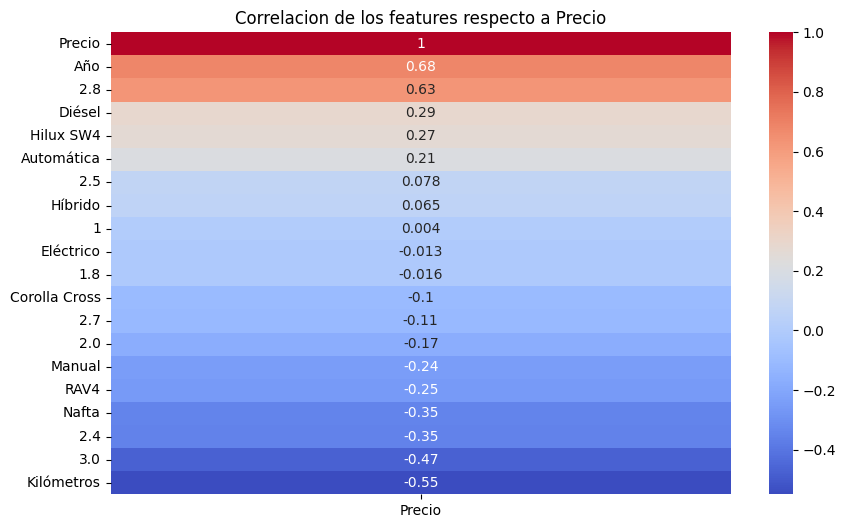

In [7]:
target_feature = 'Precio'

correlations = processed_df.corr()[target_feature].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(processed_df.corr()[[target_feature]].sort_values(by=target_feature, ascending=False), annot=True, cmap='coolwarm')
plt.title(f'Correlacion de los features respecto a {target_feature}')
plt.show()

In [15]:

features = processed_df.columns.tolist()
correlations = []
for feature in features:
    correlation_feature_price = processed_df[feature].corr(processed_df['Precio'])
    correlations.append(feature)
    print(f'Correlacion entre {feature} y price = {correlation_feature_price}')

Correlacion entre Año y price = 0.6828264621413388
Correlacion entre Kilómetros y price = -0.5492066838783745
Correlacion entre Precio y price = 1.0
Correlacion entre Corolla Cross y price = -0.10373244154865645
Correlacion entre Hilux SW4 y price = 0.2667973979522515
Correlacion entre RAV4 y price = -0.2536065380556891
Correlacion entre Diésel y price = 0.2891107271901171
Correlacion entre Eléctrico y price = -0.012706040817586573
Correlacion entre Híbrido y price = 0.0651351569538572
Correlacion entre Nafta y price = -0.34673721915011274
Correlacion entre Automática y price = 0.2117767617078819
Correlacion entre Manual y price = -0.24475596221479556
Correlacion entre 1 y price = 0.00400999323379128
Correlacion entre 1.8 y price = -0.015774405306120984
Correlacion entre 2.0 y price = -0.1705297791558581
Correlacion entre 2.4 y price = -0.35284053087434086
Correlacion entre 2.5 y price = 0.07817580953454559
Correlacion entre 2.7 y price = -0.11341984191043482
Correlacion entre 2.8 y pr

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Division del test set en features y target**

In [8]:
X_test = processed_test_df.drop(columns=['Precio'])
y_test = processed_test_df['Precio']

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Division del dev set en train y validation (80% train, 20% validation)**

In [9]:

X_train, X_val, y_train, y_val = train_val_split(processed_df, 'Precio')

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Normalizacion de los features numericos utilizando min max scaler**

In [10]:
features_to_normalize = ['Año','Kilómetros']
min_max_values = {feature : (X_train[feature].min(), X_train[feature].max()) for feature in features_to_normalize}
#print(X_train['Kilómetros'])

for feature in features_to_normalize:
    min_val, max_val = min_max_values[feature]
    #print(min_val, max_val)
    X_train[feature] = normalize(X_train, feature, min_val, max_val, [0, 1])
    X_val[feature] = normalize(X_val, feature, min_val, max_val, [0, 1])
    X_test[feature] = normalize(X_test, feature, min_val, max_val, [0, 1])
    


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Regresion no lineal en los features con regularizacion L2 utilizando train-val split (80-20) para entrenar el modelo. Se utilizan los hiperparametros lambda = 0.1 y grado del polinomio = 2**

In [11]:
#Ridge regression, non linear on the features with L2 regularization.

degree = 2
lambda_penalty = 0.1

ridge_regr = RidgeRegression(lambda_penalty=0.1, degree=degree)
ridge_regr.fit(X_train, y_train)
y_train_pred_ridge_regr = ridge_regr.predict(X_train)
y_val_pred_ridge_regr = ridge_regr.predict(X_val)

rmse_ridge_regresion = rmse(y_val.to_numpy(), y_val_pred_ridge_regr)
mae_ridge_regresion = mae(y_val.to_numpy(), y_val_pred_ridge_regr)
r2_ridge_regresion = r2(y_val.to_numpy(), y_val_pred_ridge_regr)

print(f'\nRMSE (Validation) for degree {degree}: {rmse_ridge_regresion}')
print(f"MAE (Validation): {mae_ridge_regresion}")
print(f"R2 (Validation): {r2_ridge_regresion}") 


RMSE (Validation) for degree 2: 4470.572787662453
MAE (Validation): 2928.4470218161314
R2 (Validation): 0.893520139486741


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Predicciones en el set de testing luego del entrenamiento del modelo**

In [12]:
y_test_pred_ridge_regr = ridge_regr.predict(X_test)

rmse_ridge_regresion_testing = rmse(y_test.to_numpy(), y_test_pred_ridge_regr)
mae_ridge_regresion_testing = mae(y_test.to_numpy(), y_test_pred_ridge_regr)
r2_ridge_regresion_testing = r2(y_test.to_numpy(), y_test_pred_ridge_regr)

print(f'\nRMSE (Validation) for degree {degree}: {rmse_ridge_regresion_testing}')
print(f"MAE (Validation): {mae_ridge_regresion_testing}")
print(f"R2 (Validation): {r2_ridge_regresion_testing}") 


RMSE (Validation) for degree 2: 4117.075134956814
MAE (Validation): 2975.085231346936
R2 (Validation): 0.8847820809677482


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Definicion de la funcion no lineal en los parametros para utilizar en la regresion no lineal**

In [13]:
def non_lineal_model(X_train, *params):

    w1, w2 = params[:2]
    eq = w1 * np.exp(-w2 * X_train['Kilómetros'])   
    linear_weights = params[2:]
    features = X_train.drop(columns=['Kilómetros']).columns.to_numpy()

    for feature, weight in zip(features, linear_weights):
        eq += X_train[feature] * weight
    return eq

initial_params = [0.01, 0.01] + [0.01] * (X_train.shape[1] - 1)

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Regresion no lineal en los parametros con regularizacion L2 utilizando train-val split (80-20) para entrenar el modelo. Se utiliza la funcion non_lineal_model y se utilizan los hiperparametros initial_params y lambda.**

In [14]:
non_linear_regr = NonLinearRegression(model_func=non_lineal_model, initial_params=initial_params, lambda_penalty=1)
non_linear_regr.fit(X_train, y_train)
y_train_pred_non_linear_regr = non_linear_regr.predict(X_train)
y_val_pred_non_linear_regr = non_linear_regr.predict(X_val)

rmse_non_linear_regr = rmse(y_val.to_numpy(), y_val_pred_non_linear_regr.to_numpy())
mae_non_linear_regr = mae(y_val.to_numpy(), y_val_pred_non_linear_regr.to_numpy())
r2_non_linear_regr = r2(y_val.to_numpy(), y_val_pred_non_linear_regr.to_numpy())

print(f'\nRMSE (Validation) {rmse_non_linear_regr}')
print(f"MAE (Validation): {mae_non_linear_regr}")
print(f"R2 (Validation): {r2_non_linear_regr}") 


RMSE (Validation) 4889.265730396763
MAE (Validation): 3243.6380424038634
R2 (Validation): 0.8726413589237626


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Prediccion utilizando el set de test para el modelo de regresion no lineal en los parametros.**

In [15]:
y_test_pred_non_linear_regr = non_linear_regr.predict(X_test)

rmse_non_linear_regr_testing = rmse(y_test.to_numpy(), y_test_pred_non_linear_regr.to_numpy())
mae_non_linear_regr_testing = mae(y_test.to_numpy(), y_test_pred_non_linear_regr.to_numpy())
r2_non_linear_regr_testing = r2(y_test.to_numpy(), y_test_pred_non_linear_regr.to_numpy())

print(f'\nRMSE(Test): {rmse_non_linear_regr_testing}')
print(f"MAE (Test): {mae_non_linear_regr_testing}")
print(f"R2 (Test): {r2_non_linear_regr_testing}")


RMSE(Test): 4379.430672119199
MAE (Test): 3150.3425505685564
R2 (Test): 0.8696299737491534


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Regresion localmente ponderada utilizando train-val split (80-20) para entrenar el modelo. Se utiliza el hiperparametro tau.**

In [16]:
tau = 1
lwr = LocallyWeightedRegression(tau)
lwr.fit(X_train, y_train)
y_train_pred_lwr = lwr.predict(X_train.to_numpy())
y_val_pred_lwr = lwr.predict(X_val.to_numpy())

rmse_lwr = rmse(y_val.to_numpy(), y_val_pred_lwr)
mae_lwr = mae(y_val.to_numpy(), y_val_pred_lwr)
r2_lwr = r2(y_val.to_numpy(), y_val_pred_lwr)

print(f'\nRMSE (Validation) {rmse_lwr}')
print(f"MAE (Validation): {mae_lwr}")
print(f"R2 (Validation): {r2_lwr}") 




RMSE (Validation) 4796.657434991235
MAE (Validation): 3172.7748125663934
R2 (Validation): 0.8774203040426192


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Predicciones en el set de test para el modelo de regresion localmente ponderado.**

In [17]:
y_test_pred_lwr = lwr.predict(X_test.to_numpy())

rmse_lwr_testing = rmse(y_test.to_numpy(), y_test_pred_lwr)
mae_lwr_testing = mae(y_test.to_numpy(), y_test_pred_lwr)
r2_lwr_testing = r2(y_test.to_numpy(), y_test_pred_lwr)

print(f'\nRMSE (Test) {rmse_lwr_testing}')
print(f"MAE (Test): {mae_lwr_testing}")
print(f"R2 (Test): {r2_lwr_testing}") 


RMSE (Test) 4083.635236412934
MAE (Test): 2934.4555609090785
R2 (Test): 0.8866461365873273


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Regresion no lineal en los features con regularizacion L2 utilizando cross-validation para entrenar el modelo. Hiperparametros: lambda y grado de polinomio.**

In [18]:
ridge_regr_cv = RidgeRegression(lambda_penalty=1, degree = 3)
training, validation = cross_val(processed_df, 'Precio', 5)

rmse_score_val_ridge_regr = []
mae_score_val_ridge_regr = []
r2_score_val_ridge_regr = []
y_val_ridge_regr_cv = []
y_predict_val_ridge_regr_cv = []

for (train, val) in zip(training, validation):

    X_train_cv, y_train_cv = train[0], train[1].to_numpy()
    X_val_cv, y_val_cv = val[0], val[1].to_numpy()

    features_to_normalize = ['Año','Kilómetros']
    min_max_values = {feature : (X_train_cv[feature].min(), X_train_cv[feature].max()) for feature in features_to_normalize}

    for feature in features_to_normalize:
        min_val, max_val = min_max_values[feature]
        X_train_cv[feature] = normalize(X_train_cv, feature, min_val, max_val, [0, 1])
        X_val_cv[feature] = normalize(X_val_cv, feature, min_val, max_val, [0, 1])


    ridge_regr_cv.fit(X_train_cv, y_train_cv)
    y_predict_val_cv = ridge_regr_cv.predict(X_val_cv)

    y_val_ridge_regr_cv.append(y_val_cv)
    y_predict_val_ridge_regr_cv.append(y_predict_val_cv)

    rmse_val = rmse(y_val_cv, y_predict_val_cv)
    mae_val = mae(y_val_cv, y_predict_val_cv)
    r2_val = r2(y_val_cv, y_predict_val_cv)

    rmse_score_val_ridge_regr.append(rmse_val)
    mae_score_val_ridge_regr.append(mae_val)
    r2_score_val_ridge_regr.append(r2_val)

rmse_ridge_regresion_cv = np.mean(rmse_score_val_ridge_regr)
mae_ridge_regresion_cv = np.mean(mae_score_val_ridge_regr)
r2_ridge_regresion_cv = np.mean(r2_score_val_ridge_regr)

print(f'\nAverage_rmse_val: {rmse_ridge_regresion_cv}')
print(f'Average_mae_val: {mae_ridge_regresion_cv}')
print(f'Average r2_val {r2_ridge_regresion_cv}')


Average_rmse_val: 4859.654972139467
Average_mae_val: 3062.282391952379
Average r2_val 0.8665138301925781


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Predicciones del set de test para el modelo de regresion no lineal en los features con regularizacion L2 entrenado utilizando cross-valdiation.**

In [19]:
y_test_pred_ridge_regr_cv = ridge_regr_cv.predict(X_test)

rmse_ridge_regresion_cv_testing = rmse(y_test.to_numpy(), y_test_pred_ridge_regr_cv)
mae_ridge_regresion_cv_testing = mae(y_test.to_numpy(), y_test_pred_ridge_regr_cv)
r2_ridge_regresion_cv_testing = r2(y_test.to_numpy(), y_test_pred_ridge_regr_cv)

print(f'\nRMSE (Test): {rmse_ridge_regresion_cv_testing}')
print(f"MAE (Test): {mae_ridge_regresion_cv_testing}")
print(f"R2 (Test): {r2_ridge_regresion_cv_testing}")


RMSE (Test): 4059.1559148509905
MAE (Test): 2973.4777126696913
R2 (Test): 0.8880010611466989


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Regresion no lineal en los parametros con regularizacion L2 utilizando el metodo de cross-validaton para entrenar el modelo. Se utiliza la funcion non_lineal_model y los hiperparametros lambda y initial params.**

In [20]:
non_linear_regr_cv = NonLinearRegression(model_func=non_lineal_model, initial_params=initial_params, lambda_penalty=1)
training, validation = cross_val(processed_df, 'Precio', 5)

rmse_score_val_non_linear = []
mae_score_val_non_linear = []
r2_score_val_non_linear = []
y_val_non_linear_regr_cv = []
y_val_pred_non_linear_regr_cv = []

for (train, val) in zip(training, validation):
    
    X_train_cv, y_train_cv = train[0], train[1].to_numpy()
    X_val_cv, y_val_cv = val[0], val[1].to_numpy()

    features_to_normalize = ['Año','Kilómetros']
    min_max_values = {feature : (X_train_cv[feature].min(), X_train_cv[feature].max()) for feature in features_to_normalize}

    for feature in features_to_normalize:
        min_val, max_val = min_max_values[feature]
        X_train_cv[feature] = normalize(X_train_cv, feature, min_val, max_val, [0, 1])
        X_val_cv[feature] = normalize(X_val_cv, feature, min_val, max_val, [0, 1])

    non_linear_regr_cv.fit(X_train_cv, y_train_cv)
    y_predict_val_cv = non_linear_regr_cv.predict(X_val_cv)

    y_val_non_linear_regr_cv.append(y_val_cv)
    y_val_pred_non_linear_regr_cv.append(y_predict_val_cv)

    rmse_val = rmse(y_val_cv, y_predict_val_cv.to_numpy())
    mae_val = mae(y_val_cv, y_predict_val_cv.to_numpy())
    r2_val = r2(y_val_cv, y_predict_val_cv.to_numpy())

    rmse_score_val_non_linear.append(rmse_val)
    mae_score_val_non_linear.append(mae_val)
    r2_score_val_non_linear.append(r2_val)


rmse_non_linear_regr_cv = np.mean(rmse_score_val_non_linear)
mae_non_linear_regr_cv = np.mean(mae_score_val_non_linear)
r2_non_linear_regr_cv = np.mean(r2_score_val_non_linear)

print(f'\nAverage_rmse_val: {rmse_non_linear_regr_cv}')
print(f'Average_mae_val: {mae_non_linear_regr_cv}')
print(f'Average r2_val {r2_non_linear_regr}')

/home/facuvulcano/miniconda3/envs/ML/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/facuvulcano/miniconda3/envs/ML/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/facuvulcano/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/facuvulcano/miniconda3/envs/ML/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/facuvulcano/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/facuvulcano/miniconda3/envs/ML/lib/python3.8/site-packages/pandas/core/arrayli


Average_rmse_val: 5285.327133015934
Average_mae_val: 3393.421245895718
Average r2_val 0.8726413589237626


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Predicciones sobre el set de test para el modelo de regresion no lineal en los parametros entrenado utilizando cross-validation.**

In [21]:
y_test_pred_non_linear_regr_cv = non_linear_regr_cv.predict(X_test)

rmse_non_linear_regr_cv_testing = rmse(y_test.to_numpy(), y_test_pred_non_linear_regr_cv)
mae_non_linear_regr_cv_testing = mae(y_test.to_numpy(), y_test_pred_non_linear_regr_cv)
r2_non_linear_regr_cv_testing = r2(y_test.to_numpy(), y_test_pred_non_linear_regr_cv)

print(f'\nRMSE (Test) {rmse_non_linear_regr_cv_testing}')
print(f"MAE (Test): {mae_non_linear_regr_cv_testing}")
print(f"R2 (Test): {r2_non_linear_regr_cv_testing}")



RMSE (Test) 4438.051894478939
MAE (Test): 3171.5162565343576
R2 (Test): 0.8661164578649089


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Regresion localmente ponderada utilizando cross-validation para entrenar el modelo. Se utiliza el hiperparametro tau.**

In [22]:
tau = 1
lwr = LocallyWeightedRegression(tau)
training, validation = cross_val(processed_df, 'Precio', 5)

rmse_score_val_lwr = []
mae_score_val_lwr = []
r2_score_val_lwr = []
y_val_lwr_cv = []
y_val_predict_lwr_cv = []

for (train, val) in zip(training, validation):

    X_train_cv, y_train_cv = train[0], train[1].to_numpy()
    X_val_cv, y_val_cv = val[0], val[1].to_numpy()

    features_to_normalize = ['Año','Kilómetros']
    min_max_values = {feature : (X_train_cv[feature].min(), X_train_cv[feature].max()) for feature in features_to_normalize}

    for feature in features_to_normalize:
        min_val, max_val = min_max_values[feature]
        X_train_cv[feature] = normalize(X_train_cv, feature, min_val, max_val, [0, 1])
        X_val_cv[feature] = normalize(X_val_cv, feature, min_val, max_val, [0, 1])

    lwr.fit(X_train_cv, y_train_cv)
    y_predict_val_cv = lwr.predict(X_val_cv.to_numpy())

    y_val_lwr_cv.append(y_val_cv)
    y_val_predict_lwr_cv.append(y_predict_val_cv)

    rmse_val = rmse(y_val_cv, y_predict_val_cv)
    mae_val = mae(y_val_cv, y_predict_val_cv)
    r2_val = r2(y_val_cv, y_predict_val_cv)

    rmse_score_val_lwr.append(rmse_val)
    mae_score_val_lwr.append(mae_val)
    r2_score_val_lwr.append(r2_val)

rmse_lwr_cv = np.mean(rmse_score_val_lwr)
mae_lwr_cv = np.mean(mae_score_val_lwr)
r2_lwr_cv = np.mean(r2_score_val_lwr)

print(f'\nAverage_rmse_val: {rmse_lwr_cv}')
print(f'Average_mae_val: {mae_lwr_cv}')
print(f'Average r2_val {r2_lwr_cv}')



Average_rmse_val: 4967.038488112683
Average_mae_val: 3196.5719329240815
Average r2_val 0.8596568679984209


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Prediciciones en el set de test utilizando la regresion localmente ponderada entrenada con cross-validation.**

In [23]:
y_test_pred_lwr_cv = lwr.predict(X_test.to_numpy())

rmse_lwr_cv_testing = rmse(y_test.to_numpy(), y_test_pred_lwr_cv)
mae_lwr_cv_testing = mae(y_test.to_numpy(), y_test_pred_lwr_cv)
r2_lwr_cv_testing = r2(y_test.to_numpy(), y_test_pred_lwr_cv)

print(f'\nRMSE: {rmse_lwr_cv_testing}')
print(f"MAE (Test): {mae_lwr_cv_testing}")
print(f"R2 (Test): {r2_lwr_cv_testing}")


RMSE: 4102.443190856239
MAE (Test): 2959.6596715904147
R2 (Test): 0.8855995867684988


<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Creacion de la tabla comparativa de metricas**

</div>

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

Aclaracion:

- Testing: hace referencia al set de test probado en los modelos entrenados solamente con train-val-split.

- Testing model with CV: hace referencia al set de test probado en los modelos que son entrenados utilizando cross-validation.

In [24]:
from tabulate import tabulate

metrics_data = {
    'Metric': ['RMSE-Validation', 'MAE-Validation', 'R2-Validation', 'RMSE-Cross_Validation', 'MAE-Cross_Validation', 'R2-Cross_Validation', 'RMSE-Testing', 'MAE-Testing', 'R2-Testing', 'RMSE-Testing model with CV', 'MAE-Testing model with CV', 'R2-Testing model with CV'],
    'Ridge Regresion': [rmse_ridge_regresion, mae_ridge_regresion, r2_ridge_regresion,
                        rmse_ridge_regresion_cv, mae_ridge_regresion_cv, r2_ridge_regresion_cv,
                        rmse_ridge_regresion_testing, mae_ridge_regresion_testing, r2_ridge_regresion_testing,
                        rmse_ridge_regresion_cv_testing, mae_ridge_regresion_cv_testing, r2_ridge_regresion_cv_testing],
    'Non-Linear Regresion': [rmse_non_linear_regr, mae_non_linear_regr, r2_non_linear_regr,
                            rmse_non_linear_regr_cv, mae_non_linear_regr_cv, r2_non_linear_regr_cv,
                            rmse_non_linear_regr_testing, mae_non_linear_regr_testing, r2_non_linear_regr_testing,
                            rmse_non_linear_regr_cv_testing, mae_non_linear_regr_cv_testing, r2_non_linear_regr_cv_testing], 
    'Locally Weighted Regresion' : [rmse_lwr, mae_lwr, r2_lwr,
                                    rmse_lwr_cv, mae_lwr_cv, r2_lwr_cv,
                                    rmse_lwr_testing, mae_lwr_testing, r2_lwr_testing,
                                    rmse_lwr_cv_testing, mae_lwr_cv_testing, r2_lwr_cv_testing]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.round(4)

print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))



╒════════════════════════════╤═══════════════════╤════════════════════════╤══════════════════════════════╕
│ Metric                     │   Ridge Regresion │   Non-Linear Regresion │   Locally Weighted Regresion │
╞════════════════════════════╪═══════════════════╪════════════════════════╪══════════════════════════════╡
│ RMSE-Validation            │         4470.57   │              4889.27   │                    4796.66   │
├────────────────────────────┼───────────────────┼────────────────────────┼──────────────────────────────┤
│ MAE-Validation             │         2928.45   │              3243.64   │                    3172.77   │
├────────────────────────────┼───────────────────┼────────────────────────┼──────────────────────────────┤
│ R2-Validation              │            0.8935 │                 0.8726 │                       0.8774 │
├────────────────────────────┼───────────────────┼────────────────────────┼──────────────────────────────┤
│ RMSE-Cross_Validation      │       

<div style="font-family: 'Source Code Pro'; font-size: 22px;">

1- Ridge Regression:

- RMSE y MAE: se obtienen resultados consistentes y relativamente bajos a traves de todos los conjuntos de datos lo que indicaria que el modelo tiene un buen rendimiento en general. El RMSE en el conjunto de testing es de 4117.08 que es el mas bajo en comparacion con otros modelos.

- R2: el valor de R2 es alto (0.8848 en el conjunto de testing) pero menor que en el de validation, no hay tanta diferencia por lo que se podria descartar el overfitting.

2- Non-linear regression: 

- RMSE y MAE: Este modelo tiene el peor rendimiento entre los tres en terminos de RMSE y MAE en los conjuntos de validacion y validacion cruzada, sin embargo mejora en el conjunto de testing.

- R2: El coeficiente de determinacion es menor comparado con otros modelos, lo que sugeriria que el modelo no captura tan bien como los otros la variabilidad de los datos.

3- Loally Weighted regression:

- RMSE y MAE: se observa un rendimiento intermedio entre los tress. Tiene un RMSE y MAE mayor que ridge regression pero menor que non-linear regression. Sin embargo en el conjunto de testing presenta el mejor RMSE y MAE, lo que indicaria que tiene una buena capacidad predictiva en datos nuevos.

- R2: EL R2 es muy similar al de ridge regression.

En conclusion: Ridge regression es el modelo con el mejor rendimiento en general en todos los conjuntos de datos, esto puede deberse a su capacidad para regualirzar coeficientes, lo que ayudaria a prevenir el overfitting y permitir una buena generalizacion con datos nuevos. Non-linear regression tiene el peor rendimiento, esto podria deberse a la complejidad del modelo, principalmente a la funcion que hace a los parametros no lineales en conjunto con la seleccion del hiperparametro. Por ultimo el modelo de regresion locally weighted muestra un rendimiento intermedio en los conjuntos en general, pero se destaca por sobre el resto en el cojunto de testing, indicando que se ajusta bien a datos desconocidos.

<div style="font-family: 'Source Code Pro'; font-size: 18px;">

## **Obtencion de los residuos de cada modelo**

In [25]:
ridge_regresion_training_residuals = np.abs(y_train - y_train_pred_ridge_regr)
ridge_regresion_validation_residuals = np.abs(y_val - y_val_pred_ridge_regr)
ridge_regresion_cv_residuals = [np.abs(y_val - y_pred) for y_val, y_pred in zip(y_val_ridge_regr_cv, y_predict_val_ridge_regr_cv)]
ridge_regresion_cv_residuals_combined = np.concatenate(ridge_regresion_cv_residuals)
ridge_regresion_testing_residuals = np.abs(y_test - y_test_pred_ridge_regr)

non_linear_regresion_training_residuals = np.abs(y_train - y_train_pred_non_linear_regr)
non_linear_regresion_validation_residuals = np.abs(y_val - y_val_pred_non_linear_regr)
non_linear_regresion_cv_residuals = [np.abs(y_val - y_pred) for y_val, y_pred, in zip(y_val_non_linear_regr_cv, y_val_pred_non_linear_regr_cv)]
non_linear_regresion_cv_residuals_combined = np.concatenate(non_linear_regresion_cv_residuals)
non_linear_regresion_testing_residuals = np.abs(y_test - y_test_pred_non_linear_regr)

lwr_training_residuals = np.abs(y_train - y_train_pred_lwr)
lwr_validation_residuals = np.abs(y_val - y_val_pred_lwr)
lwr_cv_residuals = [np.abs(y_val - y_pred) for y_val, y_pred in zip(y_val_lwr_cv, y_val_predict_lwr_cv)]
lwr_cv_residuals_combined = np.concatenate(lwr_cv_residuals)
lwr_testing_residuals = np.abs(y_test - y_test_pred_lwr)

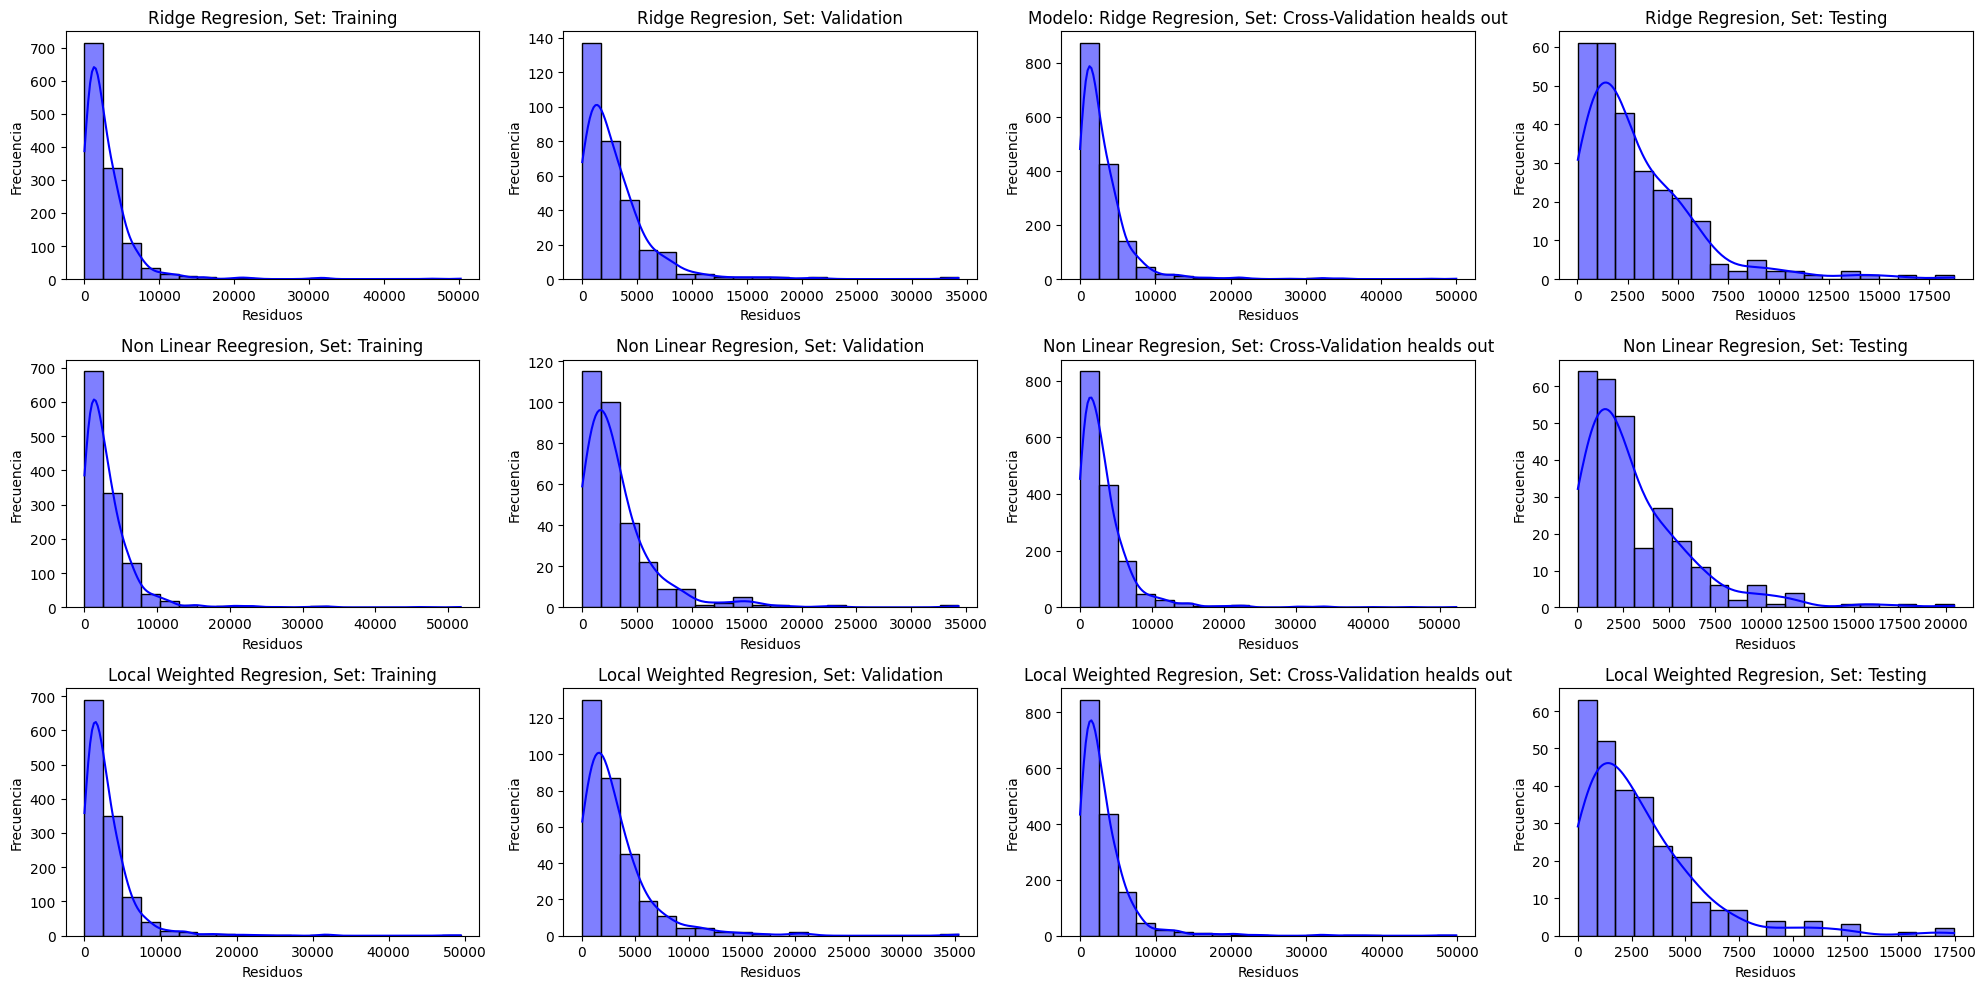

In [26]:
plt.figure(figsize=(20, 10))


plt.subplot(3, 4, 1)
sns.histplot(ridge_regresion_training_residuals, bins=20, kde=True, color='blue')
plt.title('Ridge Regresion, Set: Training')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 2)
sns.histplot(ridge_regresion_validation_residuals, bins=20, kde=True, color='blue')
plt.title('Ridge Regresion, Set: Validation')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 3)
sns.histplot(ridge_regresion_cv_residuals_combined, bins=20, kde=True, color='blue')
plt.title('Modelo: Ridge Regresion, Set: Cross-Validation healds out')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 4)
sns.histplot(ridge_regresion_testing_residuals, bins=20, kde=True, color='blue')
plt.title('Ridge Regresion, Set: Testing')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 5)
sns.histplot(non_linear_regresion_training_residuals, bins=20, kde=True, color='blue')
plt.title('Non Linear Reegresion, Set: Training')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 6)
sns.histplot(non_linear_regresion_validation_residuals, bins=20, kde=True, color='blue')
plt.title('Non Linear Regresion, Set: Validation')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 7)
sns.histplot(non_linear_regresion_cv_residuals_combined, bins=20, kde=True, color='blue')
plt.title('Non Linear Regresion, Set: Cross-Validation healds out')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 8)
sns.histplot(non_linear_regresion_testing_residuals, bins=20, kde=True, color='blue')
plt.title('Non Linear Regresion, Set: Testing')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 9)
sns.histplot(lwr_training_residuals, bins=20, kde=True, color='blue')
plt.title('Local Weighted Regresion, Set: Training')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 10)
sns.histplot(lwr_validation_residuals, bins=20, kde=True, color='blue')
plt.title('Local Weighted Regresion, Set: Validation')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 11)
sns.histplot(lwr_cv_residuals_combined, bins=20, kde=True, color='blue')
plt.title('Local Weighted Regresion, Set: Cross-Validation healds out')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(3, 4, 12)
sns.histplot(lwr_testing_residuals, bins=20, kde=True, color='blue')
plt.title('Local Weighted Regresion, Set: Testing')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

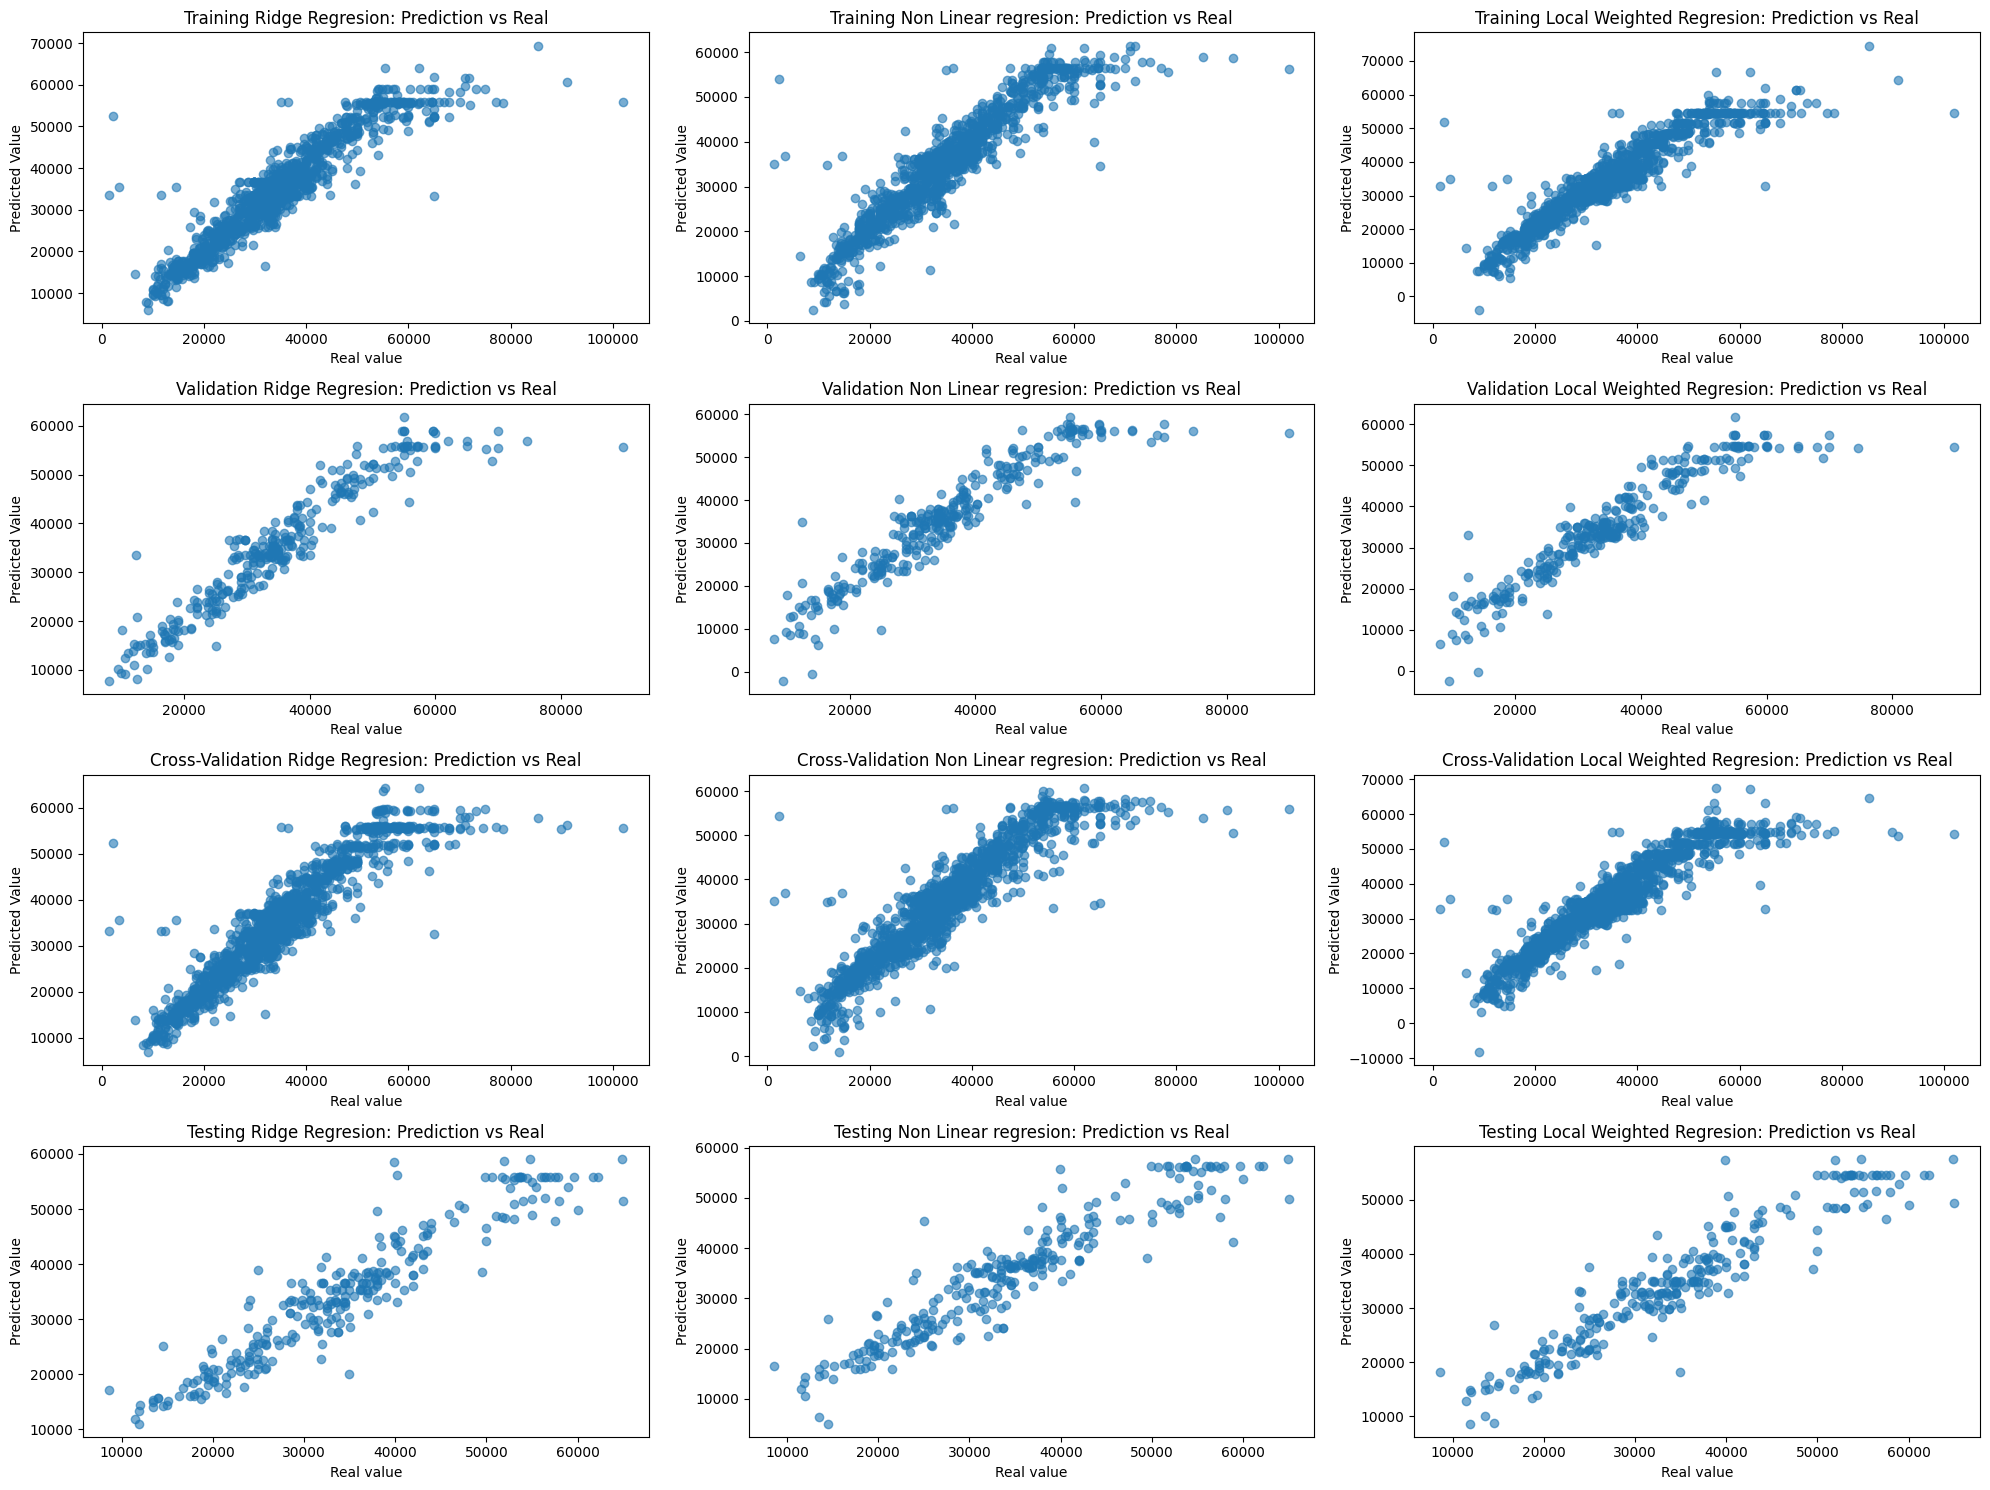

In [27]:
plt.figure(figsize=(20, 15))

plt.subplot(4, 3, 1)
plt.scatter(y_train, y_train_pred_ridge_regr, alpha=0.6)
plt.title('Training Ridge Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 2)
plt.scatter(y_train, y_train_pred_non_linear_regr, alpha=0.6)
plt.title('Training Non Linear regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 3)
plt.scatter(y_train, y_train_pred_lwr, alpha=0.6)
plt.title('Training Local Weighted Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 4)
plt.scatter(y_val, y_val_pred_ridge_regr, alpha=0.6)
plt.title('Validation Ridge Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 5)
plt.scatter(y_val, y_val_pred_non_linear_regr, alpha=0.6)
plt.title('Validation Non Linear regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 6)
plt.scatter(y_val, y_val_pred_lwr, alpha=0.6)
plt.title('Validation Local Weighted Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 7)
plt.scatter(y_val_ridge_regr_cv, y_predict_val_ridge_regr_cv, alpha=0.6)
plt.title('Cross-Validation Ridge Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 8)
plt.scatter(y_val_non_linear_regr_cv, y_val_pred_non_linear_regr_cv, alpha=0.6)
plt.title('Cross-Validation Non Linear regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 9)
plt.scatter(y_val_lwr_cv, y_val_predict_lwr_cv, alpha=0.6)
plt.title('Cross-Validation Local Weighted Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 10)
plt.scatter(y_test, y_test_pred_ridge_regr, alpha=0.6)
plt.title('Testing Ridge Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 11)
plt.scatter(y_test, y_test_pred_non_linear_regr, alpha=0.6)
plt.title('Testing Non Linear regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.subplot(4, 3, 12)
plt.scatter(y_test, y_test_pred_lwr, alpha=0.6)
plt.title('Testing Local Weighted Regresion: Prediction vs Real')
plt.xlabel('Real value')
plt.ylabel('Predicted Value')

plt.tight_layout()
plt.show()